In [147]:

import pandas as pd


df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', encoding='latin1')

df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [148]:
#Knowing the number of rows and columns
df.shape

(7043, 21)

In [149]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [150]:
df['Churn'].value_counts(normalize=True)
#هان وضحت نسبة العملاء المتسربين من الشركة 

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [151]:
df['Churn'].value_counts(normalize=True) * 100#لحساب النسبة من مئة 

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [152]:
"Target Variable (Churn)"
"Definition: A categorical variable (Yes/No) indicating if a customer left the service."
"Distribution: The data is imbalanced, with 73.46% staying (No) and 26.54% leaving (Yes)."

'Distribution: The data is imbalanced, with 73.46% staying (No) and 26.54% leaving (Yes).'

In [153]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [154]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [155]:
#"1. Dataset Overview
#"Scale: The dataset contains 7,043 customers and 21 columns."

#"Categories:"

#"Demographics: Gender, seniority, partner, and dependents."

#"Services: Phone, multiple lines, internet, cybersecurity, tech support, and streaming."

#"Financials: Tenure, contract type, payment method, monthly charges, and total charges."

In [156]:
#The purpose of this section is to conduct Bivariate Analysis to understand the relative distribution of the target variable across different payment method categories.
#I used crosstab instead of groupby because it's more efficient at creating a Contingency Table. 
# It calculates the frequencies of the intersection of the variables PaymentMethod and Churn in a structured and organized manner.
#normalize='index'We calculate the percentage for each row (Row-wise normalization).

In [157]:
# مقارنة نوع العقد بمعدل التسرب
#هان السطرين مجرد اختبار اولي 
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
print(contract_churn)

Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


In [158]:

contract_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
print(contract_churn)

Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


In [159]:
df.dtypes

customerID              str
gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges            str
Churn                   str
dtype: object

In [160]:
#"Identified Technical Issues"
#"Data Type Mismatch: The TotalCharges column is stored as Text/Object instead of Float, which prevents mathematical calculations"

#"Irrelevant Features: The CustomerID column provides no analytical value and should be removed to reduce redundancy."
#"Categorical Redundancy: Repeating No internet service across multiple columns (like OnlineSecurity and TechSupport) causes Multicollinearity,"
#" requiring these categories to be merged or simplified."

In [161]:
#✅Phase 1 — First Look (EDA Basics)
#✅Phase 2 — Column Meaning & Types Audit
#Category,Columns,Required Action
#Identifiers,customerID,Drop
#Numeric Values,"MonthlyCharges, tenure, TotalCharges",Ensure they are float64/int64
#Binary Variables,"Partner, Dependents, PhoneService, etc.",Convert to Boolean
#Target Variable,Churn,Convert to Numeric (0/1)

In [162]:
#Critical Columns (High Priority)
#These three columns are the most impactful; any error in their data type will compromise the entire analysis:

#TotalCharges: Must be converted from string (str) to a floating-point number (float64) to enable mathematical calculations.

#Churn: Needs to be converted from a string to Integer (0/1) or Boolean as it is the target variable for modeling.

#customerID: It is a unique identifier with no analytical value and should be Dropped to reduce redundancy.

In [163]:
import pandas as pd
import numpy as np

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# --- (Missing Values) ---
missing_count = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100#لحساب النسبة المئوية للفقد بناءا على البيانات 
missing_report = pd.concat([missing_count, missing_percentage], axis=1, keys=['Count', 'Percentage (%)'])#لترتيب طريقة العرض العدد والنسبة 
print("--- Missing Values Report ---")
print(missing_report[missing_report['Count'] > 0]) # عرض المفقود فقط
print("\n")

# --- (Duplicates) ---
#وجود تكرار  بناءا على id
customer_duplicates = df['customerID'].duplicated().sum()#لفحص كل صف هل تكرر سابقا ام لا 
print(f"--- Duplicates Check ---")
print(f"Number of duplicate customerIDs: {customer_duplicates}")
print("\n")

# --(Invalid Values / Empty Spaces) ---
# فحص المسافات الفارغة في عمود TotalCharges الذي اكتشفناه سابقاً
empty_spaces = (df['TotalCharges'] == " ").sum()
print(f"--- Invalid Values Check ---")
print(f"Empty spaces in TotalCharges: {empty_spaces}")
# فحص الفئات الغريبة في عمود Churn (تأكد من وجود Yes/No فقط)
print(f"Unique values in Churn: {df['Churn'].unique()}")
print("\n")

# ---(Outliers) ---
# ملاحظة: يجب تحويل TotalCharges لرقم أولاً ليعمل الفحص
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')#يحول اي قيمة نصية لرقم وغير النصوص يجعلها nan 
#The idea: To identify values ​​that are illogically deviating from the "data center".
# Distance calculation ($IQR = Q3 - Q1$): This represents the 50% range of the middle data.
#Fencing determination: Subtraction and addition ($1.5 times IQR$) of springs
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

monthly_outliers = get_outliers(df, 'MonthlyCharges')
total_outliers = get_outliers(df.dropna(subset=['TotalCharges']), 'TotalCharges')

print(f"--- Outliers Report ---")
print(f"Outliers in MonthlyCharges: {len(monthly_outliers)}")
print(f"Outliers in TotalCharges: {len(total_outliers)}")

--- Missing Values Report ---
Empty DataFrame
Columns: [Count, Percentage (%)]
Index: []


--- Duplicates Check ---
Number of duplicate customerIDs: 0


--- Invalid Values Check ---
Empty spaces in TotalCharges: 11
Unique values in Churn: <StringArray>
['No', 'Yes']
Length: 2, dtype: str


--- Outliers Report ---
Outliers in MonthlyCharges: 0
Outliers in TotalCharges: 0


In [164]:
#✅Phase 3 — Data Quality Check (Before Cleaning)
# TotalCharges: "It contains 11 spaces, which caused it to be identified as a string and hindered calculations."

# customerID: "There are no duplicates, but it remains a unique identifier and is not used in statistical analysis."

# Outliers: "There are no outliers, meaning the financial data is consistent and follows a normal pattern."

In [165]:
# تحويل عمود SeniorCitizen من Integer إلى Boolean
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)

# للتأكد من النتيجة
print(df['SeniorCitizen'].head())
print(df['SeniorCitizen'].dtype)

0    False
1    False
2    False
3    False
4    False
Name: SeniorCitizen, dtype: bool
bool


In [166]:
# تحويل عمود SeniorCitizen من Integer إلى Boolean

df['Partner'] = df['Partner'].astype(bool)

# للتأكد من النتيجة
print(df['Partner'].head())
print(df['Partner'].dtype)

df['Dependents'] = df['Dependents'].astype(bool)

print(df['Dependents'].head())
print(df['Dependents'].dtype)

df['PhoneService'] = df['PhoneService'].astype(bool)

print(df['PhoneService'].head())
print(df['PhoneService'].dtype)

df['MultipleLines'] = df['MultipleLines'].astype(bool)

print(df['MultipleLines'].head())
print(df['MultipleLines'].dtype)

df['OnlineSecurity'] = df['OnlineSecurity'].astype(bool)


# للتأكد من النتيجة
print(df['OnlineSecurity'].head())
print(df['OnlineSecurity'].dtype)

df['DeviceProtection'] = df['DeviceProtection'].astype(bool)
# للتأكد من النتيجة
print(df['DeviceProtection'].head())
print(df['DeviceProtection'].dtype)

df['TechSupport'] = df['TechSupport'].astype(bool)
# للتأكد من النتيجة
print(df['TechSupport'].head())
print(df['TechSupport'].dtype)

df['PaperlessBilling'] = df['PaperlessBilling'].astype(bool)
# للتأكد من النتيجة
print(df['PaperlessBilling'].head())
print(df['PaperlessBilling'].dtype)

df['StreamingTV'] = df['StreamingTV'].astype(bool)
# للتأكد من النتيجة
print(df['StreamingTV'].head())
print(df['StreamingTV'].dtype)
df['OnlineBackup'] = df['OnlineBackup'].astype(bool)
# للتأكد من النتيجة
print(df['OnlineBackup'].head())
print(df['OnlineBackup'].dtype)
#كملي باقي 


0    True
1    True
2    True
3    True
4    True
Name: Partner, dtype: bool
bool
0    True
1    True
2    True
3    True
4    True
Name: Dependents, dtype: bool
bool
0    True
1    True
2    True
3    True
4    True
Name: PhoneService, dtype: bool
bool
0    True
1    True
2    True
3    True
4    True
Name: MultipleLines, dtype: bool
bool
0    True
1    True
2    True
3    True
4    True
Name: OnlineSecurity, dtype: bool
bool
0    True
1    True
2    True
3    True
4    True
Name: DeviceProtection, dtype: bool
bool
0    True
1    True
2    True
3    True
4    True
Name: TechSupport, dtype: bool
bool
0    True
1    True
2    True
3    True
4    True
Name: PaperlessBilling, dtype: bool
bool
0    True
1    True
2    True
3    True
4    True
Name: StreamingTV, dtype: bool
bool
0    True
1    True
2    True
3    True
4    True
Name: OnlineBackup, dtype: bool
bool


In [167]:
import pandas as pd
#عملية املاء الفراغات هنا كانت ب0 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')#عملية تحويل لقيم عددية 


df['TotalCharges'] = df['TotalCharges'].fillna(0)#استبدال الnanالناتجة عن العملية السابقة ب0

# سنقوم بربط 'Yes' بالرقم 1 و 'No' بالرقم 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# تحويل نوع العمود إلى integer لضمان التنسيق الرقمي
df['Churn'] = df['Churn'].astype(int)
# التأكد من النتائج بعد الإصلاح
print("أنواع البيانات بعد التحويل:")
print(df[['TotalCharges', 'Churn']].dtypes) 

print("\nأول 5 صفوف من النتائج:")
print(df[['TotalCharges', 'Churn']].head())



أنواع البيانات بعد التحويل:
TotalCharges    float64
Churn             int64
dtype: object

أول 5 صفوف من النتائج:
   TotalCharges  Churn
0         29.85      0
1       1889.50      0
2        108.15      1
3       1840.75      0
4        151.65      1


In [168]:
# قائمة الأعمدة التي تحتوي على "No internet service"
#All these services depend on having an internet connection. In the raw data, 
# you will find three values: (Yes, No, No internet service).
#التحويل لتوحيد البيانات وسهولة التعامل معها واستنتاج معلومات منطقية 
cols_to_fix = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# استبدال "No internet service" بـ "No" لتوحيد الفئات
#انا اعتبرتها كانها noبدلا من ان تكون تصنيف جديد
for col in cols_to_fix:
    df[col] = df[col].replace('No internet service', 'No')

# إصلاح عمود خطوط الهاتف أيضاً
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

# التأكد من النتائج
print("الفئات الجديدة في عمود OnlineSecurity:")
print(df['OnlineSecurity'].unique())

الفئات الجديدة في عمود OnlineSecurity:
[ True]


In [169]:
#ازالة عمود idلعدم اهيميته في تحليل البيانات بناءا على هدف العمل 
df.drop('customerID', axis=1, inplace=True)




In [170]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,False,True,True,1,True,True,DSL,True,True,True,True,True,No,Month-to-month,True,Electronic check,29.85,29.85,0
1,Male,False,True,True,34,True,True,DSL,True,True,True,True,True,No,One year,True,Mailed check,56.95,1889.50,0
2,Male,False,True,True,2,True,True,DSL,True,True,True,True,True,No,Month-to-month,True,Mailed check,53.85,108.15,1
3,Male,False,True,True,45,True,True,DSL,True,True,True,True,True,No,One year,True,Bank transfer (automatic),42.30,1840.75,0
4,Female,False,True,True,2,True,True,Fiber optic,True,True,True,True,True,No,Month-to-month,True,Electronic check,70.70,151.65,1
5,Female,False,True,True,8,True,True,Fiber optic,True,True,True,True,True,Yes,Month-to-month,True,Electronic check,99.65,820.50,1
6,Male,False,True,True,22,True,True,Fiber optic,True,True,True,True,True,No,Month-to-month,True,Credit card (automatic),89.10,1949.40,0
7,Female,False,True,True,10,True,True,DSL,True,True,True,True,True,No,Month-to-month,True,Mailed check,29.75,301.90,0
8,Female,False,True,True,28,True,True,Fiber optic,True,True,True,True,True,Yes,Month-to-month,True,Electronic check,104.80,3046.05,1
9,Male,False,True,True,62,True,True,DSL,True,True,True,True,True,No,One year,True,Bank transfer (automatic),56.15,3487.95,0


In [171]:
#✅Phase 4 — Data Cleaning (Execute + Explain)

In [172]:
#هنا الفكرة تصنيف العملاء بناءا على مدة العقد وقياس مدى ولاء العميل بناءاعلى مدة اشتراكه الجديد احتمال ترسيبه اعلى
#قيمة 1 يعني شهريا  واحتمال ترسيبه اعلى 

df['is_month_to_month'] = df['Contract'].apply(lambda x: 1 if x == 'Month-to-month' else 0)#lamda هي دالة سريعة للمرور على كل العمود
def categorize_contract(contract):
    if contract == 'Month-to-month':
        return 'month'
    elif contract == 'One year':
        return 'year'
    elif contract == 'Two year':
        return 'two-year'
    else:
        return 'unknown'
#I created a completely new column called contract_length_group.
df['contract_length_group'] = df['Contract'].apply(categorize_contract)

# عرض أول 5 صفوف للتأكد من النتيجة
print(df[['Contract', 'is_month_to_month', 'contract_length_group']].head())

         Contract  is_month_to_month contract_length_group
0  Month-to-month                  1                 month
1        One year                  0                  year
2  Month-to-month                  1                 month
3        One year                  0                  year
4  Month-to-month                  1                 month


In [173]:
#This column measures true "spending intensity" regardless of subscription length. A customer who pays a large amount in
#a short period behaves differently than one who pays the same amount over years.
#اضفت 1 لتجنب القسمة على 0
df['avg_spend_per_month'] = df['TotalCharges'] / (df['tenure'] + 1)

# نقارن قيمة كل صف بالوسيط (median) لعمود MonthlyChargesلتحديد العملاء مرتفعين الدفع 
#For comparison: The code asks: "Does this customer pay more than 50% more per month than other customers?"
#The conversion (astype(int))): If the answer is "yes," it takes the value 1; if it is "no," it takes 0.
monthly_median = df['MonthlyCharges'].median()
df['high_monthly_charge'] = (df['MonthlyCharges'] > monthly_median).astype(int)

total_median = df['TotalCharges'].median()
df['high_total_charge'] = (df['TotalCharges'] > total_median).astype(int)

print(df[['tenure', 'avg_spend_per_month', 'high_monthly_charge', 'high_total_charge']].head())
#high_monthly_charge#يعطي للعميل الذي يدفع اكثر من المتوسط قيمة 1قي عمود

   tenure  avg_spend_per_month  high_monthly_charge  high_total_charge
0       1            14.925000                    0                  0
1      34            53.985714                    0                  1
2       2            36.050000                    0                  0
3      45            40.016304                    0                  1
4       2            50.550000                    1                  0


In [174]:
#نلاحظ ان العميل رقم 4 يدفع اكثر من متوسط وهنا هو عرضة لتسريب 

In [175]:
# 1. تحديد العملاء الجدد (فترة بقاء 3 أشهر أو أقل)
# سنحول النتيجة إلى (0 و 1) ليسهل معالجتها رياضياً
df['new_customer'] = (df['tenure'] <= 3).astype(int)

# 2. تحديد العملاء القدامى)
df['long_term_customer'] = (df['tenure'] >= 24).astype(int)

# عرض عينة من البيانات للتحقق
print(df[['tenure', 'new_customer', 'long_term_customer']].head(10))

   tenure  new_customer  long_term_customer
0       1             1                   0
1      34             0                   1
2       2             1                   0
3      45             0                   1
4       2             1                   0
5       8             0                   0
6      22             0                   0
7      10             0                   0
8      28             0                   1
9      62             0                   1


In [176]:
# 1. تحديد مستخدمي "الشيك الإلكتروني"
df['uses_electronic_check'] = (df['PaymentMethod'] == 'Electronic check').astype(int)

# 2. تحويل "الفواتير الورقية" إلى قيم رقمية (0 أو 1)
# إذا كان العمود الأصلي يحتوي على 'Yes' و 'No'
df['paperless_billing'] = df['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)

# عرض النتيجة للتأكد
print(df[['PaymentMethod', 'uses_electronic_check', 'PaperlessBilling', 'paperless_billing']].head())

               PaymentMethod  uses_electronic_check  PaperlessBilling  \
0           Electronic check                      1              True   
1               Mailed check                      0              True   
2               Mailed check                      0              True   
3  Bank transfer (automatic)                      0              True   
4           Electronic check                      1              True   

   paperless_billing  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


In [177]:
1
# 1. إنشاء ميزة: العميل لا يملك حماية إلكترونية
# بما أن العمود Boolean، فإن ~ تعكس القيمة (True تصبح False والعكس)
# ثم نحولها إلى 1 (خطر) و 0 (أمان)
df['no_online_security'] = (~df['OnlineSecurity']).astype(int)

# 2. تحليل إضافي: هل العميل جديد وبدون حماية؟ 
# (هذا المزيج هو الأكثر عرضة للتسرب)
if 'new_customer' in df.columns:
    df['unprotected_new_customer'] = ((df['no_online_security'] == 1) & (df['new_customer'] == 1)).astype(int)

# عرض النتيجة للتأكد من الميزات الجديدة
print(df[['OnlineSecurity', 'no_online_security']].head())

   OnlineSecurity  no_online_security
0            True                   0
1            True                   0
2            True                   0
3            True                   0
4            True                   0


In [178]:
2
# 1. تحويل StreamingTV إلى ميزة رقمية
# نضع 1 إذا كان مشتركاً و 0 إذا لم يكن
df['uses_streaming_tv'] = (df['StreamingTV'] == 'Yes').astype(int)

# 2. إنشاء ميزة "العميل الملتصق" (Sticky Customer)
# العميل الذي لديه حماية أمنية (العمود البولين لديك) وخدمة تلفزيون
# هؤلاء هم الأقل عرضة للمغادرة
df['sticky_customer'] = ((df['OnlineSecurity'] == True) & (df['uses_streaming_tv'] == 1)).astype(int)

# 3. ميزة "الترفيه فقط" (Entertainment Only)
# إذا كان لديه تلفزيون لكن ليس لديه حماية أمنية، قد يكون عميلاً غير مستقر
df['entertainment_no_security'] = ((df['OnlineSecurity'] == False) & (df['uses_streaming_tv'] == 1)).astype(int)
#

In [179]:
3
# 1. تحديد عملاء الألياف الضوئية (غالباً هم الأكثر عرضة للمغادرة بسبب السعر)
df['is_fiber_optic'] = (df['InternetService'] == 'Fiber optic').astype(int)

# 2. تحديد العملاء بدون إنترنت (الأكثر وفاءً/أقل خطورة)
df['no_internet'] = (df['InternetService'] == 'No').astype(int)

# 3. ميزة "الخطر المالي والتقني": عميل ألياف ضوئية وبدون حماية أمنية
# (بما أن OnlineSecurity لديك Boolean كما ذكرت سابقاً)
df['fiber_no_security'] = ((df['is_fiber_optic'] == 1) & (df['OnlineSecurity'] == False)).astype(int)

In [180]:
#ند إدخال InternetService في نموذج الذكاء الاصطناعي، سيتعلم الموديل أن:

#Fiber optic + High Monthly Charges = احتمالية تسرب مرتفعة.

#DSL + Long Tenure = احتمالية تسرب منخفضة جداً.

#No Internet Service = عميل مستقر للغاية ولكنه قليل الربحية
#استعنت في الشات لاستنتاج العلاقات 

In [181]:
4
# 1. تحويل الدعم الفني إلى ميزة رقمية
# 1 إذا كان لديه دعم، 0 إذا لم يكن لديه 
df['has_tech_support'] = (df['TechSupport'] == 'Yes').astype(int)

#إذا كان العميل يستخدم أليافاً ضوئية (خدمة حساسة) و لا يملك دعماً تقنياً (لا يوجد أمان)،
#  فهو "عميل هش" أو "معرض للخطر" بشدة. هذا العميل هو أول من سيرحل عند حدوث أول مشكلة تقنية.

if 'is_fiber_optic' in df.columns:
    df['vulnerable_fiber_user'] = ((df['is_fiber_optic'] == 1) & (df['has_tech_support'] == 0)).astype(int)

# عميل لديه حماية أمنية (العمود البولين لديك) ودعم فني
df['fully_secured_user'] = ((df['OnlineSecurity'] == True) & (df['has_tech_support'] == 1)).astype(int)

In [182]:
5
# 1. تحويل تعدد الخطوط إلى ميزة رقمية (1 للمشترك، 0 لغير ذلك)
df['has_multiple_lines'] = (df['MultipleLines'] == 'Yes').astype(int)

# 2.  (High-Value Telephony)
# عميل لديه خطوط متعددة وفاتورة شهرية عالية
if 'high_monthly_charge' in df.columns:
    df['premium_phone_user'] = ((df['has_multiple_lines'] == 1) & (df['high_monthly_charge'] == 1)).astype(int)

# 3. ميزة "الارتباط الكامل": إنترنت ألياف + خطوط متعددة
if 'is_fiber_optic' in df.columns:
    df['full_home_package'] = ((df['is_fiber_optic'] == 1) & (df['has_multiple_lines'] == 1)).astype(int)

In [183]:
#✅Phase 5 — Feature Engineering (Create New Features)
#Monthly Contract Index (is_month_to_month): Identify customers without long-term commitments; these are the most likely to leave easily.

#Average Monthly Spend (avg_spend_per_month): Measure actual spending intensity; high spenders may seek cheaper alternatives.

#New Customers (new_customer): Focus on those with subscriptions of less than 3 months, a critical period when loyalty tends to decline.

#Paperless Invoices (is_paperless): Identify tech-savvy users, who statistics indicate are more likely to compare and switch.

#Lack of Online Security (no_online_security): Detect customers lacking digital security, making them more vulnerable to technical issues and subsequent churn.
#Fiber optic service (is_fiber_optic): Identifying high-speed, cost-effective internet users; they are the most sensitive to service outages or price increases.

#Technical support (has_tech_support): A positive feature ("security factor") that increases customer loyalty and reduces the likelihood of customer turnover.

#Sticky customer (sticky_customer): Identifying users of multiple services (security + entertainment); they are less likely to switch to a competitor due to the "switching cost."

In [184]:

df.info()

if df.isnull().sum().sum() == 0:
    print("\n✅ لا توجد قيم مفقودة.")
else:
    print(f"\n⚠️ عدد القيم المفقودة: {df.isnull().sum().sum()}")

print(f"\n📏 حجم البيانات الحالي (Rows, Columns): {df.shape}")

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     7043 non-null   str    
 1   SeniorCitizen              7043 non-null   bool   
 2   Partner                    7043 non-null   bool   
 3   Dependents                 7043 non-null   bool   
 4   tenure                     7043 non-null   int64  
 5   PhoneService               7043 non-null   bool   
 6   MultipleLines              7043 non-null   bool   
 7   InternetService            7043 non-null   str    
 8   OnlineSecurity             7043 non-null   bool   
 9   OnlineBackup               7043 non-null   bool   
 10  DeviceProtection           7043 non-null   bool   
 11  TechSupport                7043 non-null   bool   
 12  StreamingTV                7043 non-null   bool   
 13  StreamingMovies            7043 non-null   str    
 14  Con

In [185]:

original_cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

current_cols = df.columns.tolist()

added_features = [col for col in current_cols if col not in original_cols]

dropped_cols = [col for col in original_cols if col not in current_cols]


print("📊 --- تقرير هيكلية البيانات النهائي --- 📊")
print(f"\n✅ الميزات الجديدة المضافة ({len(added_features)}):")
for feature in added_features:
    print(f"   - {feature}")

print(f"\n🗑️  الأعمدة التي تم حذفها أو استبدالها ({len(dropped_cols)}):")
for col in dropped_cols:
    print(f"   - {col}")

print(f"\n📏 الحجم النهائي للبيانات: {df.shape}")

📊 --- تقرير هيكلية البيانات النهائي --- 📊

✅ الميزات الجديدة المضافة (24):
   - Churn
   - is_month_to_month
   - contract_length_group
   - avg_spend_per_month
   - high_monthly_charge
   - high_total_charge
   - new_customer
   - long_term_customer
   - uses_electronic_check
   - paperless_billing
   - no_online_security
   - unprotected_new_customer
   - uses_streaming_tv
   - sticky_customer
   - entertainment_no_security
   - is_fiber_optic
   - no_internet
   - fiber_no_security
   - has_tech_support
   - vulnerable_fiber_user
   - fully_secured_user
   - has_multiple_lines
   - premium_phone_user
   - full_home_package

🗑️  الأعمدة التي تم حذفها أو استبدالها (1):
   - customerID

📏 الحجم النهائي للبيانات: (7043, 43)


In [186]:
df.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,entertainment_no_security,is_fiber_optic,no_internet,fiber_no_security,has_tech_support,vulnerable_fiber_user,fully_secured_user,has_multiple_lines,premium_phone_user,full_home_package
0,Female,False,True,True,1,True,True,DSL,True,True,...,0,0,0,0,0,0,0,0,0,0
1,Male,False,True,True,34,True,True,DSL,True,True,...,0,0,0,0,0,0,0,0,0,0
2,Male,False,True,True,2,True,True,DSL,True,True,...,0,0,0,0,0,0,0,0,0,0
3,Male,False,True,True,45,True,True,DSL,True,True,...,0,0,0,0,0,0,0,0,0,0
4,Female,False,True,True,2,True,True,Fiber optic,True,True,...,0,1,0,0,0,1,0,0,0,0
5,Female,False,True,True,8,True,True,Fiber optic,True,True,...,0,1,0,0,0,1,0,0,0,0
6,Male,False,True,True,22,True,True,Fiber optic,True,True,...,0,1,0,0,0,1,0,0,0,0
7,Female,False,True,True,10,True,True,DSL,True,True,...,0,0,0,0,0,0,0,0,0,0
8,Female,False,True,True,28,True,True,Fiber optic,True,True,...,0,1,0,0,0,1,0,0,0,0
9,Male,False,True,True,62,True,True,DSL,True,True,...,0,0,0,0,0,0,0,0,0,0


In [187]:
#✅Phase 6 — Final Dataset Readiness Check
#We changed the data type and added columns with new properties to increase
#  the clarity of relationships and facilitate prediction.

In [188]:
#At the end of the process of working with and analyzing the above database in terms of data type
# , its deviations from the original text, and the relationships between its components, 
# in order to predict and analyze its impact on customer attrition, I suggest adding:

#A counter to track the number of calls to technical support to determine the size and frequency of usage problems.

#Offering promotions and discounts when various subscriptions increase monthly.

#Adding customer feedback on the service.

#Explaining the reason for choosing this location to allow for continuous improvement.

#Increasing the number of cash payment locations in residential areas.

In [189]:
%pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
df.describe

<bound method NDFrame.describe of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     Female          False     True        True       1          True   
1       Male          False     True        True      34          True   
2       Male          False     True        True       2          True   
3       Male          False     True        True      45          True   
4     Female          False     True        True       2          True   
...      ...            ...      ...         ...     ...           ...   
7038    Male          False     True        True      24          True   
7039  Female          False     True        True      72          True   
7040  Female          False     True        True      11          True   
7041    Male           True     True        True       4          True   
7042    Male          False     True        True      66          True   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  ...  \
0  

In [ ]:
# تحديد الأعمدة التي نوعها bool وتحويلها إلى int (0 و 1)
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     7043 non-null   str    
 1   SeniorCitizen              7043 non-null   int64  
 2   Partner                    7043 non-null   int64  
 3   Dependents                 7043 non-null   int64  
 4   tenure                     7043 non-null   int64  
 5   PhoneService               7043 non-null   int64  
 6   MultipleLines              7043 non-null   int64  
 7   InternetService            7043 non-null   str    
 8   OnlineSecurity             7043 non-null   int64  
 9   OnlineBackup               7043 non-null   int64  
 10  DeviceProtection           7043 non-null   int64  
 11  TechSupport                7043 non-null   int64  
 12  StreamingTV                7043 non-null   int64  
 13  StreamingMovies            7043 non-null   str    
 14  Con

In [193]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,entertainment_no_security,is_fiber_optic,no_internet,fiber_no_security,has_tech_support,vulnerable_fiber_user,fully_secured_user,has_multiple_lines,premium_phone_user,full_home_package
0,Female,0,1,1,1,1,1,DSL,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Male,0,1,1,34,1,1,DSL,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Male,0,1,1,2,1,1,DSL,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Male,0,1,1,45,1,1,DSL,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Female,0,1,1,2,1,1,Fiber optic,1,1,...,0,1,0,0,0,1,0,0,0,0
5,Female,0,1,1,8,1,1,Fiber optic,1,1,...,0,1,0,0,0,1,0,0,0,0
6,Male,0,1,1,22,1,1,Fiber optic,1,1,...,0,1,0,0,0,1,0,0,0,0
7,Female,0,1,1,10,1,1,DSL,1,1,...,0,0,0,0,0,0,0,0,0,0
8,Female,0,1,1,28,1,1,Fiber optic,1,1,...,0,1,0,0,0,1,0,0,0,0
9,Male,0,1,1,62,1,1,DSL,1,1,...,0,0,0,0,0,0,0,0,0,0


In [194]:
import pandas as pd

import pandas as pd
#الاعمدة التي اريد دمجها 
security_and_value_cols = [
    'no_online_security', 
    'unprotected_new_customer', 
    
    'entertainment_no_security', 
    'fully_secured_user'
]


df['has_any_security_or_value_service'] = df[security_and_value_cols].any(axis=1).astype(int)

df.drop(columns=security_and_value_cols, inplace=True, errors='ignore')


print(df[['has_any_security_or_value_service']].head())

   has_any_security_or_value_service
0                                  0
1                                  0
2                                  0
3                                  0
4                                  0


In [195]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,sticky_customer,is_fiber_optic,no_internet,fiber_no_security,has_tech_support,vulnerable_fiber_user,has_multiple_lines,premium_phone_user,full_home_package,has_any_security_or_value_service
0,Female,0,1,1,1,1,1,DSL,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Male,0,1,1,34,1,1,DSL,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Male,0,1,1,2,1,1,DSL,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Male,0,1,1,45,1,1,DSL,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Female,0,1,1,2,1,1,Fiber optic,1,1,...,0,1,0,0,0,1,0,0,0,0
5,Female,0,1,1,8,1,1,Fiber optic,1,1,...,0,1,0,0,0,1,0,0,0,0
6,Male,0,1,1,22,1,1,Fiber optic,1,1,...,0,1,0,0,0,1,0,0,0,0
7,Female,0,1,1,10,1,1,DSL,1,1,...,0,0,0,0,0,0,0,0,0,0
8,Female,0,1,1,28,1,1,Fiber optic,1,1,...,0,1,0,0,0,1,0,0,0,0
9,Male,0,1,1,62,1,1,DSL,1,1,...,0,0,0,0,0,0,0,0,0,0


In [196]:
import pandas as pd
#الاعمدة التي اريد دمجها 
financial_cols = [
    'avg_spend_per_month', 
    'high_monthly_charge', 
    'high_total_charge'
]

## 2. Column Merging with an OR Condition
# Note: If `avg_spend_per_month` is a number and not (0 or 1),

# it is recommended to ensure it is converted to True/False logic within the function.
df['high_spending_indicator'] = df[financial_cols].any(axis=1).astype(int)
#عملية الحذف الاغمدة التي تم دمجها 
df.drop(columns=financial_cols, inplace=True)

print(df[['high_spending_indicator']].head())

   high_spending_indicator
0                        1
1                        1
2                        1
3                        1
4                        1


In [197]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,is_fiber_optic,no_internet,fiber_no_security,has_tech_support,vulnerable_fiber_user,has_multiple_lines,premium_phone_user,full_home_package,has_any_security_or_value_service,high_spending_indicator
0,Female,0,1,1,1,1,1,DSL,1,1,...,0,0,0,0,0,0,0,0,0,1
1,Male,0,1,1,34,1,1,DSL,1,1,...,0,0,0,0,0,0,0,0,0,1
2,Male,0,1,1,2,1,1,DSL,1,1,...,0,0,0,0,0,0,0,0,0,1
3,Male,0,1,1,45,1,1,DSL,1,1,...,0,0,0,0,0,0,0,0,0,1
4,Female,0,1,1,2,1,1,Fiber optic,1,1,...,1,0,0,0,1,0,0,0,0,1


In [198]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'is_month_to_month',
       'contract_length_group', 'new_customer', 'long_term_customer',
       'uses_electronic_check', 'paperless_billing', 'uses_streaming_tv',
       'sticky_customer', 'is_fiber_optic', 'no_internet', 'fiber_no_security',
       'has_tech_support', 'vulnerable_fiber_user', 'has_multiple_lines',
       'premium_phone_user', 'full_home_package',
       'has_any_security_or_value_service', 'high_spending_indicator'],
      dtype='str')

In [199]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [200]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [201]:
df.info

<bound method DataFrame.info of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     Female              0        1           1       1             1   
1       Male              0        1           1      34             1   
2       Male              0        1           1       2             1   
3       Male              0        1           1      45             1   
4     Female              0        1           1       2             1   
...      ...            ...      ...         ...     ...           ...   
7038    Male              0        1           1      24             1   
7039  Female              0        1           1      72             1   
7040  Female              0        1           1      11             1   
7041    Male              1        1           1       4             1   
7042    Male              0        1           1      66             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  ...  \
0    

In [202]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [219]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

Encoder = OneHotEncoder(sparse_output=False, drop='first')

cols_to_encode = ['InternetService', 'PaymentMethod']

Transformed_Data = Encoder.fit_transform(df[cols_to_encode])

Transformed_Df = pd.DataFrame(Transformed_Data, columns=Encoder.get_feature_names_out())

Transformed_Df.head(10)

,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,1.0,0.0
6,1.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0


In [204]:
df.info


<bound method DataFrame.info of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     Female              0        1           1       1             1   
1       Male              0        1           1      34             1   
2       Male              0        1           1       2             1   
3       Male              0        1           1      45             1   
4     Female              0        1           1       2             1   
...      ...            ...      ...         ...     ...           ...   
7038    Male              0        1           1      24             1   
7039  Female              0        1           1      72             1   
7040  Female              0        1           1      11             1   
7041    Male              1        1           1       4             1   
7042    Male              0        1           1      66             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  ...  \
0    

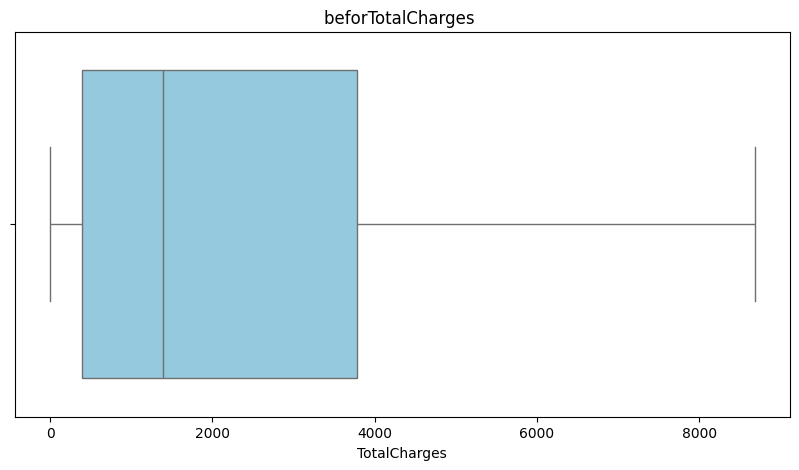

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

# رسم Boxplot لرؤية القيم الشاذة (النقاط التي تظهر خارج حدود الصندوق)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['TotalCharges'], color='skyblue')
plt.title('beforTotalCharges ')
plt.show()

In [206]:
## ---(Outliers) ---
# ملاحظة: يجب تحويل TotalCharges لرقم أولاً ليعمل الفحص
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')#يحول اي قيمة نصية لرقم وغير النصوص يجعلها nan 
#The idea: To identify values ​​that are illogically deviating from the "data center".
# Distance calculation ($IQR = Q3 - Q1$): This represents the 50% range of the middle data.
#Fencing determination: Subtraction and addition ($1.5 times IQR$) of springs
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

monthly_outliers = get_outliers(df, 'MonthlyCharges')
total_outliers = get_outliers(df.dropna(subset=['TotalCharges']), 'TotalCharges')

print(f"--- Outliers Report ---")
print(f"Outliers in MonthlyCharges: {len(monthly_outliers)}")
print(f"Outliers in TotalCharges: {len(total_outliers)}")

--- Outliers Report ---
Outliers in MonthlyCharges: 0
Outliers in TotalCharges: 0


In [207]:
pip install datasist

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\user\AppData\Local\Temp\ipykernel_2472\2798802995.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TotalCharges', data=df, palette='Set3')


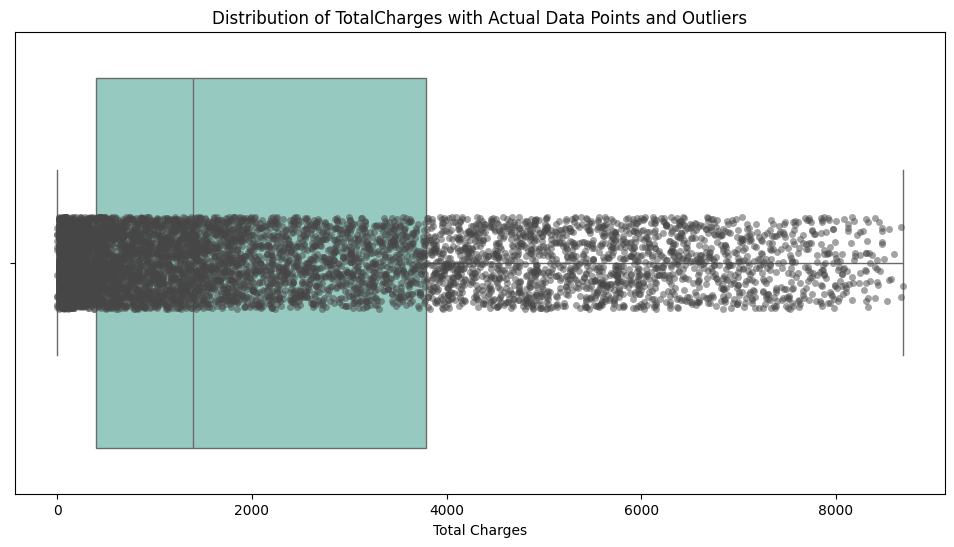

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# 1. Create the Boxplot to show statistical distribution and quartiles
sns.boxplot(x='TotalCharges', data=df, palette='Set3')

# 2. Overlay the Stripplot to see the actual data points
# Using dark color (#474646) as requested with alpha for transparency
sns.stripplot(x='TotalCharges', data=df, color="#474646", alpha=0.5)

# Add title and axis labels
plt.title('Distribution of TotalCharges with Actual Data Points and Outliers')
plt.xlabel('Total Charges')

# Display the plot
plt.show()

In [209]:

# 1. تحديد الهدف (Target)
y = df['Churn']

# سنحذف عمود Churn من X لأنه هو الهدف
x = df.drop('Churn', axis=1)

print(f"Shape of Features (x): {x.shape}")
print(f"Shape of Target (y): {y.shape}")

Shape of Features (x): (7043, 37)
Shape of Target (y): (7043,)


In [210]:
from sklearn.model_selection import train_test_split

#Data segmentation
# test_size=0.2 means 20% for testing
# stratify=y ensures the same percentage of exiting customers in training and testing
# random_state=42 ensures the same results upon rerun
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)


print(f"Training data size:: {x_train.shape}")
print(f"Test data size:: {x_test.shape}")

Training data size:: (5634, 37)
Test data size:: (1409, 37)


In [211]:
 # Convert all text columns to numbers (One-Hot Encoding)

#For the scaling process to be correct, we convert all data to numbers.
x = pd.get_dummies(x, drop_first=True)

print(x.dtypes)

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
is_month_to_month                          int64
new_customer                               int64
long_term_customer                         int64
uses_electronic_check                      int64
paperless_billing                          int64
uses_streaming_tv                          int64
sticky_customer     

In [212]:
from sklearn.model_selection import train_test_split
#Divide the data into two separate sets; one for training (80%) and the other for testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [213]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# الآن لن يظهر خطأ 'Male' لأن الكلمة تحولت إلى 0 أو 1
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("done", x_train_scaled.shape)

done (5634, 42)


In [214]:
# 1. تحويل كل ما هو نص إلى أرقام دفعة واحدة (أضمن طريقة)
x = pd.get_dummies(x, drop_first=True)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#Calling up the "Standard Scaling" tool which converts large and small numbers to a uniform range (often between -3 and 3)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#The fit arithmetic mean and standard deviation are calculated for each column.
#He applies the mathematical equation to convert
#  each original value into a "modified" value based on the calculations he has learned.
x_train_scaled = scaler.fit_transform(x_train)

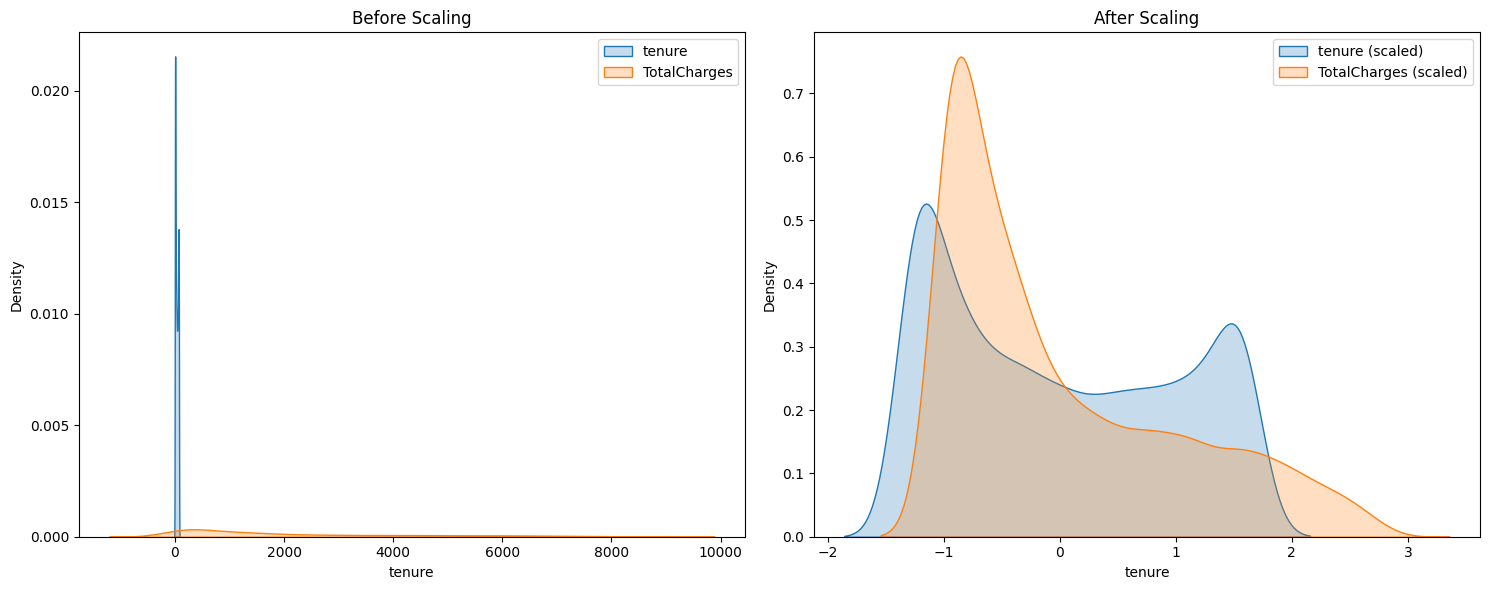

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# x_train.columns يضمن أن الأعمدة لها نفس الأسماء الأصلية
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)


plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(x_train['tenure'], label='tenure', fill=True)
sns.kdeplot(x_train['TotalCharges'], label='TotalCharges', fill=True)
plt.title('Before Scaling')
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(x_train_scaled_df['tenure'], label='tenure (scaled)', fill=True)
sns.kdeplot(x_train_scaled_df['TotalCharges'], label='TotalCharges (scaled)', fill=True)
plt.title('After Scaling')
plt.legend()

plt.tight_layout()
plt.show()

In [216]:
df.head

<bound method NDFrame.head of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     Female              0        1           1       1             1   
1       Male              0        1           1      34             1   
2       Male              0        1           1       2             1   
3       Male              0        1           1      45             1   
4     Female              0        1           1       2             1   
...      ...            ...      ...         ...     ...           ...   
7038    Male              0        1           1      24             1   
7039  Female              0        1           1      72             1   
7040  Female              0        1           1      11             1   
7041    Male              1        1           1       4             1   
7042    Male              0        1           1      66             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  ...  \
0      